# Parameter Estimation the Bayesian way

In engineering and science data analysis we often want to find the values of parameters in a model that best fit the data. A common example is fitting the slope and intercept in a straight line model. This chapter introduces how Bayes' theorem can be used to achieve this parameter estimation. The examples used are chosen to make the process clear.

## A first application of Bayes' Theorem – the fair coin

The first draft of these notes is being written at the time of the inaugral Las Vegas F1 Grand Prix (the street circuit, not the infamous cruise round the casino car-park of the early 1980s) so it seems apt to consider the fair coin problem.

On a visit to Las Vegas you are presented with a coin, it looks a little odd so you ask yourself the question "What is the probability that this coin is fair?" A fair coin is one that when tossed is unbiased - a long run of coin tosses will given on average the same number of heads (H) as tails (T).

In the following we will deal with the proportionality {eq}`bayesprop` as this will allow us to see the bayesian updating process in action without overally complex computations being required. This is fine because the denominator of {eq}`bayes` provides normalisation so the optimum value of a parameter will not be affected.

We begin by considering the model, or hypothesis, that we are interested in assessing. All we know is that the coin is from Las Vegas so there is a chance it may be biased - the proportion of heads generated by flipping the coin could vary from 0 (all tails) to 1 (all heads). We can model this in terms of a set of hypotheses that cover this range $H_i$ (monotonically) and ask which of these is the most likely, $H_0$? If we then take a set of flips of the coin (data) we can find out which of the $H_i$ best matches the data i.e. $H_0$. A $H_0$ value of $0.5$ corresponds to a completely fair coin.  

It can be shown that that if the flips of the coin are independent the probability of obtaining $R$ heads in $N$ is given by:

$$ \mathrm{prob}(\{data\}|H,I)\propto H^R(1-H)^{N-R}$$(flipProb)

This type of probability problem can be modelled with 
We also need a *prior* for our model. Before any flips of the coin are made we have no reason to favour any $H_i$ so could reasonably apply the same probability to each - this is known as a flat, or uniformative, prior–see plot below. In forthcoming calculations the range of $H_i$ will be divided up into 100 segments - the flat prior value has been chosen so that the total probability will sum to one. 

Text(0, 0.5, 'Prior probability density')

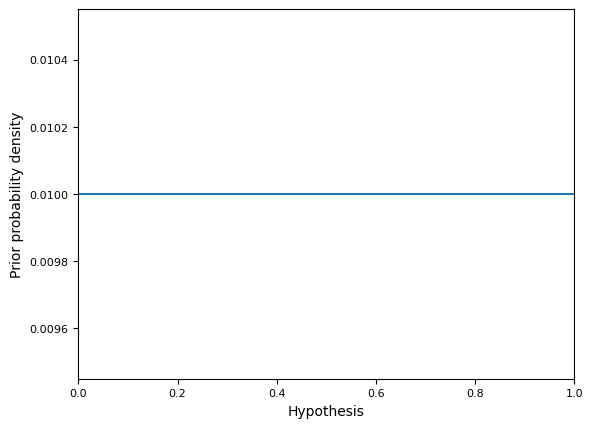

In [1]:
# Plot of prior for fair coin problem
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([0,1],[0.01,0.01])  # Plot prior on the axes.
ax.set_xlim(0, 1)
ax.set_xlabel('Hypothesis')
ax.set_ylabel('Prior probability density')
#plt.show()

Let's assume the coin is tossed and returns a head. This means we have 1 head in 1 flip of the coin and equation {eq}`flipProb` gives us:

$$\textrm{p}(\{\textrm{data=`H`\},|H,I})\propto H$$

The product of this with our flat prior probability will give us the posterior probability. This will be $\propto H$ - a straight line starting from zero (probability of only tails) and reaching a maximum at $H=1$ (probability of only heads). This tells us that the coin is most likely one that always gives heads, but it is not stongly in favour of this model.

A second coin toss also gives a head. Now we have $N=2$ and $R=2$ for {eq}`flipProb` and the prior is now $H$. The product of these gives us $\textrm{prob}\propto H^2$. This is even more strongly in favour of the heads-only scenario–this is not unreasonable as at this stage we have no data to indicate that there is evan a tail side to the coin.

Text(0, 0.5, 'Probability')

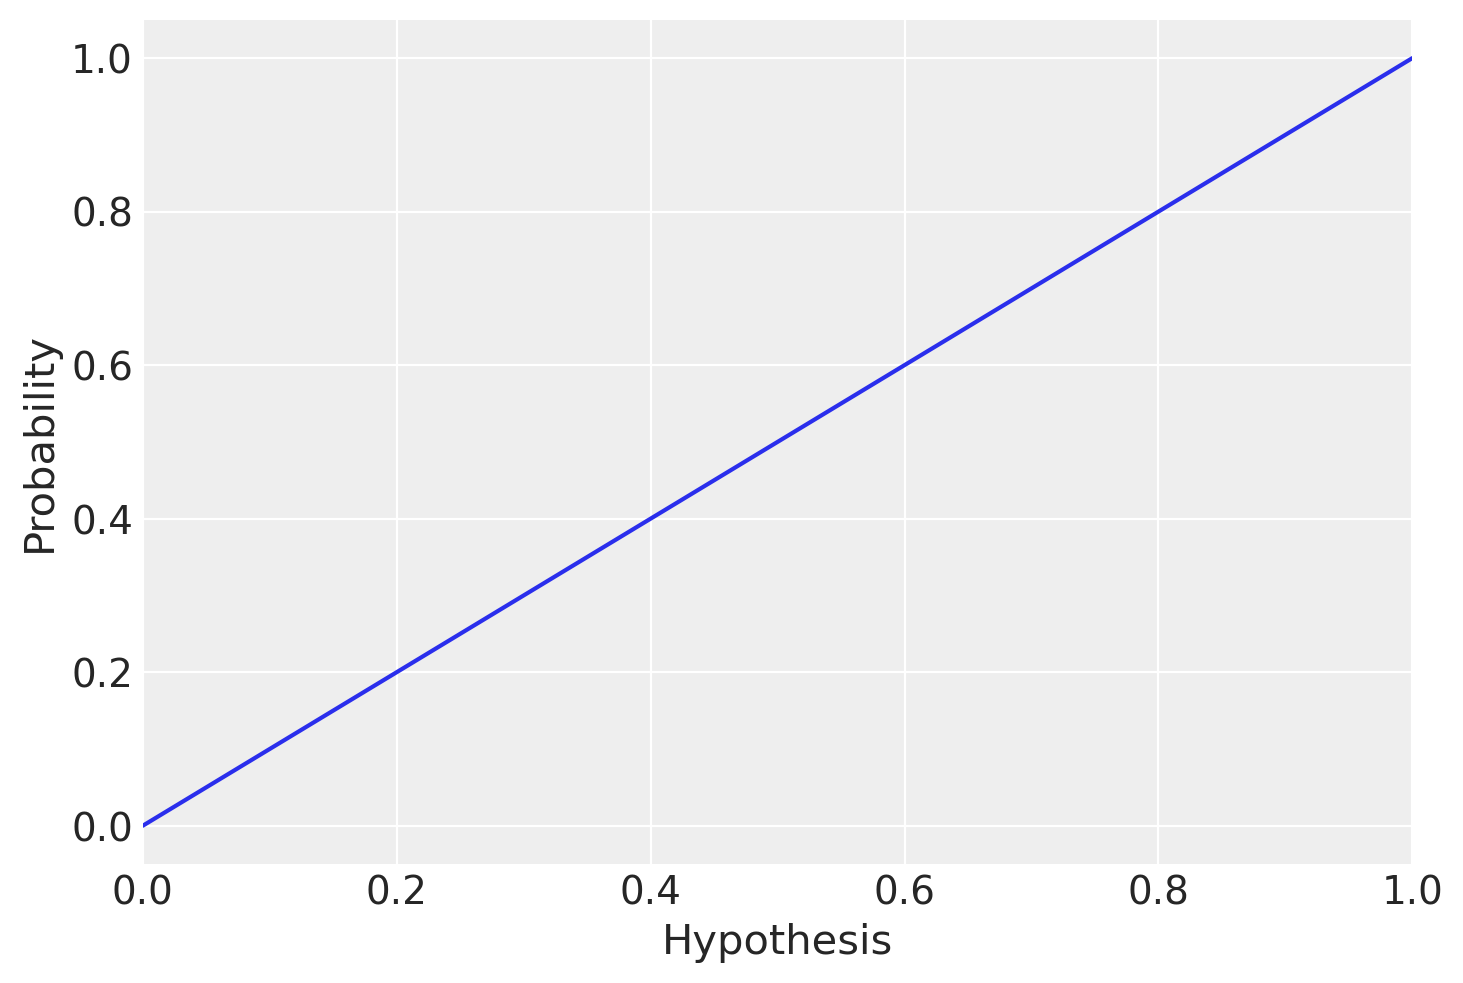

In [2]:

# Plot probability for single head
# borrow heavily from the pymc resources for Statistical Rethinking

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import scipy.stats as stats

success_true = 0.3 # this is the "true" value for the odds of the coin giving a head

%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

grid_points = 10 # use low number for testing

def uniform_prior(grid_points):
    """
    Returns Uniform prior density

            Parameters:
                grid_points (numpy.array): Array of prior values

            Returns:
                density (numpy.array): Uniform density of prior values
    """
    return np.repeat(1, grid_points)


# define grid
p_grid = np.linspace(0, 1, grid_points) # these are the x values

# define prior
prior = uniform_prior(grid_points) # y values 

# compute likelihood at each point in the grid
# For single toss that gives 1 head, binomial function gives likelihood = H
# compute product of likelihood and prior
#unstd_posterior = likelihood * prior
likelihood = p_grid*prior
unstd_posterior = likelihood * prior
# standardize the posterior, so it sums to 1
#posterior = unstd_posterior / unstd_posterior.sum()
#return p_grid, posterior
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(p_grid,unstd_posterior)  # Plot prior on the axes.
ax.set_xlim(0, 1)
ax.set_xlabel('Hypothesis')
ax.set_ylabel('Probability')
#plt.show()

In [3]:
p_grid

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

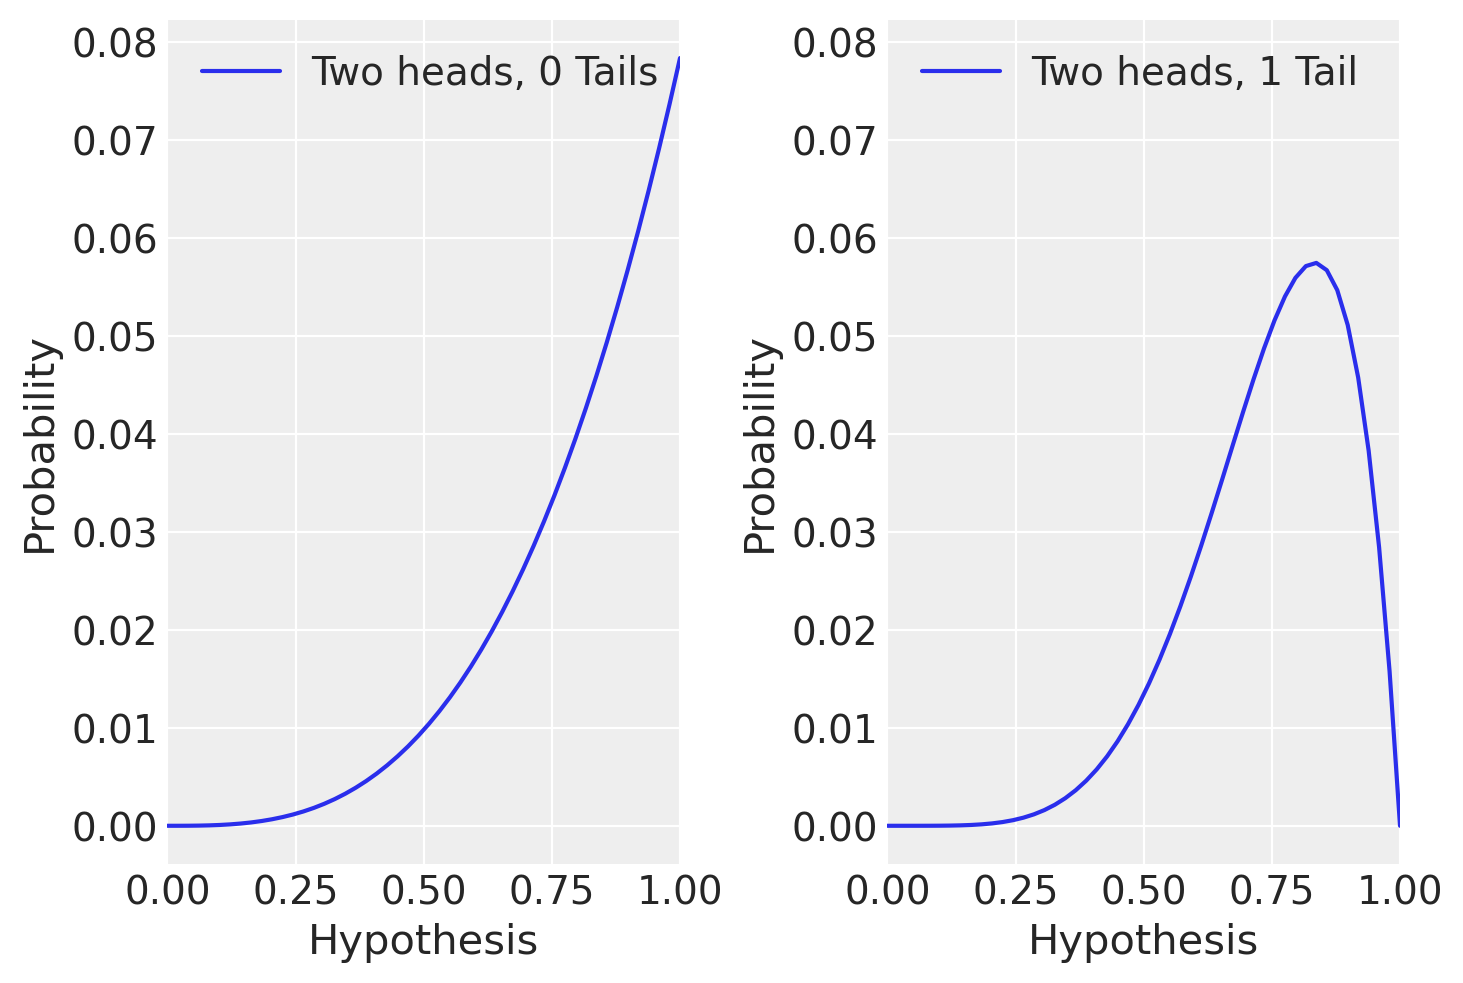

In [4]:
success_true = 0.3 # this is the "true" value for the odds of the coin giving a head

RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

grid_points = 50 # use low number for testing

def uniform_prior(grid_points):
    """
    Returns Uniform prior density

            Parameters:
                grid_points (numpy.array): Array of prior values

            Returns:
                density (numpy.array): Uniform density of prior values
    """
    return np.repeat(1, grid_points)


# define grid
p_grid = np.linspace(0, 1, grid_points) # these are the x values

# define prior
prior = uniform_prior(grid_points) # y values 

# compute likelihood at each point in the grid
# For single toss that gives 1 head, binomial function gives likelihood = H
# compute product of likelihood and prior
#unstd_posterior = likelihood * prior
likelihood = p_grid*prior
unstd_posterior = likelihood * prior

prior = unstd_posterior.copy() # old posterior becomes new prior

likelihood = stats.binom.pmf(2, n=2, p=p_grid)
unstd_posterior = likelihood * prior
# standardize the posterior, so it sums to 1
posterior = unstd_posterior / unstd_posterior.sum()
#return p_grid, posterior
fig, (ax1, ax2) = plt.subplots(1,2)  # Create a figure containing a single axes.
ax1.plot(p_grid,posterior, label='Two heads, 0 Tails')  # Plot prior on the axes.
ax1.set_xlim(0, 1)
ax1.set_xlabel('Hypothesis')
ax1.set_ylabel('Probability')
ax1.legend(loc="upper left")

# Now add in a tail
prior = unstd_posterior.copy() # old posterior becomes new prior
likelihood = stats.binom.pmf(2, n=3, p=p_grid)
unstd_posterior = likelihood * prior
# standardize the posterior, so it sums to 1
posterior = unstd_posterior / unstd_posterior.sum()
#return p_grid, posterior

ax2.plot(p_grid,posterior, label='Two heads, 1 Tail')  # Plot prior on the axes.
ax2.set_xlim(0, 1)
ax2.set_ylim(ax1.get_ylim()[0],ax1.get_ylim()[1]) # make plots have same range
ax2.set_xlabel('Hypothesis')
ax2.set_ylabel('Probability')
ax2.legend(loc="upper left")

In [5]:
np.random.binomial(1,0.3)

1

/var/folders/6b/rj66v4j97dv1s8324xz7_7000000gn/T/ipykernel_37977/2328146770.py:30: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.5)


/var/folders/6b/rj66v4j97dv1s8324xz7_7000000gn/T/ipykernel_37977/2328146770.py:45: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig("NCoinFlips.pdf", dpi=fig.dpi)
/var/folders/6b/rj66v4j97dv1s8324xz7_7000000gn/T/ipykernel_37977/2328146770.py:45: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig("NCoinFlips.pdf", dpi=fig.dpi)


/Users/simonmartin/mambaforge/envs/mpp001/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


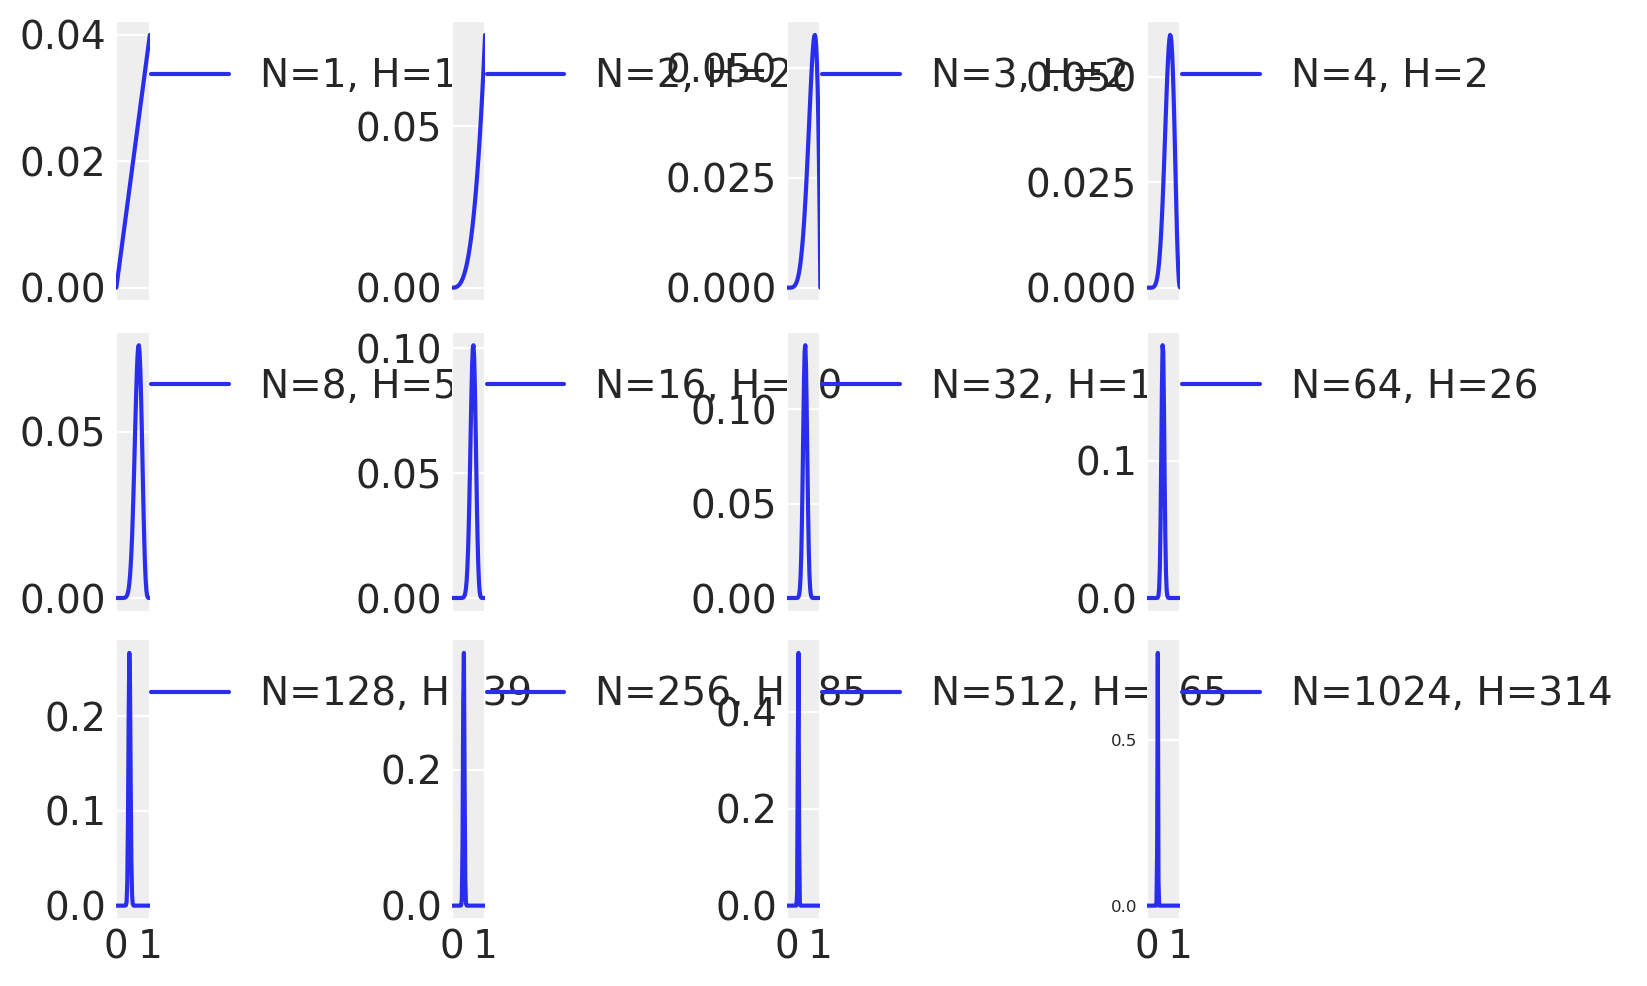

In [6]:
def countHeads(data,n):
    """counts the number of heads (1) in first n elements of array data"""
    sum = 0
    for i in range (n):
        if data[i]: sum = sum +1
    return sum

# create an array of coin toss results: 1=H, 0=T
results = np.zeros(1024, dtype=np.int8)
# results of first three tosses are defined above
results[0] = 1
results[1] = 1
results[2] = 0
# now fill the rst of the array with coin tosses head probability given by success_true
for i in range(3,1024):
    results[i] = np.random.binomial(1,success_true)

# make an array of plots showing the effect of adding the tosses successively
N_toss_list = [1, 2, 3, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

# set up uniform prior for start of calculation
# define grid
p_grid = np.linspace(0, 1, grid_points) # these are the x values

# define prior
prior = uniform_prior(grid_points) # y values 
likelihood = uniform_prior(grid_points)
# use an array of subplots
fig, ax = plt.subplots(nrows=3,ncols=4,sharex=True)
plt.subplots_adjust(hspace=0.5)
plt.yticks(fontsize=6)
for frame, N in enumerate(N_toss_list):
    unstd_posterior = likelihood * prior
    # update likelihood and prior
    prior = unstd_posterior.copy() # old posterior becomes new prior
    nheads = countHeads(results, N) 
    likelihood = stats.binom.pmf(nheads, n=N, p=p_grid)
    unstd_posterior = likelihood * prior
    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    ax[int(frame/4),frame%4].plot(p_grid,posterior, label=f"N={N_toss_list[frame]}, H={nheads}")  # Plot prior on the axes.
    ax[int(frame/4),frame%4].set_xlim(0, 1)
    ax[int(frame/4),frame%4].set_xlim(0, 1)
    ax[int(frame/4),frame%4].legend(loc="upper left")
plt.savefig("NCoinFlips.pdf", dpi=fig.dpi)

In [7]:
frame

11

In [8]:
countHeads(results, 4) 

2

In [9]:
ax

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)